In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)
print('Successful!')

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.1
Successful!


Evaluating TS.................................................. 2.8 seconds
Regret: 120.80 +/- 6.05 (median: 111.50, max: 248.00, min: 21.00)
Evaluating PHE.................................................. 4.2 seconds
Regret: 117.98 +/- 5.57 (median: 114.00, max: 290.00, min: 45.00)
Evaluating PHE.................................................. 4.2 seconds
Regret: 188.66 +/- 51.41 (median: 54.00, max: 2249.00, min: -39.00)
Evaluating All Histroy-Swapping.................................................. 57.9 seconds
Regret: 209.44 +/- 48.64 (median: 51.00, max: 1676.00, min: 12.00)
Evaluating All Histroy-Swapping.................................................. 61.0 seconds
Regret: 125.76 +/- 31.01 (median: 39.50, max: 1223.00, min: 2.00)
Evaluating All Histroy-Swapping.................................................. 66.1 seconds
Regret: 85.62 +/- 14.73 (median: 55.00, max: 591.00, min: 8.00)
Evaluating All Histroy-Swapping.................................................. 72.1 s

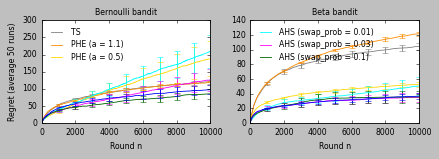

In [3]:
import datetime

algs = [
  ("TS", {}, "gray", "-", "TS"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
  ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
  ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  #("HistorySwapping", {"swap_prob": 0.}, "gray", "-", "HS (swap_prob = 0.)"),
  #("HistorySwapping", {"swap_prob": 0.01}, "darkgreen", "-", "HS (swap_prob = 0.01)"),
  #("HistorySwapping", {"swap_prob": 0.03}, "red", "-", "HS (swap_prob = 0.03)"),
  #("HistorySwapping", {"swap_prob": 0.05}, "blue", "-", "HS (swap_prob = 0.05)"),
  #("HistorySwapping", {"swap_prob": 0.02}, "black", "-", "HS (swap_prob = 0.02)"),
  #("FreshHistorySwapping", {"swap_prob": 0.0001}, "magenta", "-", "FHS (swap_prob = 0.0003)"),
  #("FreshHistorySwapping", {"swap_prob": 0.0003}, "black", "-", "FHS (swap_prob = 0.0003)"),
  #("FreshHistorySwapping", {"swap_prob": 0.001}, "cyan", "-", "FHS (swap_prob = 0.001)"),
  #("FreshHistorySwapping", {"swap_prob": 0.003}, "darkgreen", "-", "FHS (swap_prob = 0.03)"),
  ("AllHistorySwapping", {"swap_prob": 0.01}, "cyan", "-", "AHS (swap_prob = 0.01)"),
  ("AllHistorySwapping", {"swap_prob": 0.03}, "magenta", "-", "AHS (swap_prob = 0.03)"),
  ("AllHistorySwapping", {"swap_prob": 0.1}, "darkgreen", "-", "AHS (swap_prob = 0.1)"),
  ("AllHistorySwapping", {"swap_prob": 0.15}, "blue", "-", "AHS (swap_prob = 0.15)"),
]
num_runs = 50
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(5.5, 2))
for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=12)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 3 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("results/AHS_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()